In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_raw = pd.read_csv('spy.csv')

In [50]:
df_raw.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,25.236158,25.236158,25.110605,25.218222,1003200,29,4,4,1,1993
1,1993-02-01,25.236146,25.397572,25.236146,25.397572,480500,1,0,5,2,1993
2,1993-02-02,25.379673,25.469354,25.325865,25.451418,201300,2,1,5,2,1993
3,1993-02-03,25.487270,25.738376,25.469334,25.720440,529400,3,2,5,2,1993
4,1993-02-04,25.810132,25.881876,25.523153,25.828068,531500,4,3,5,2,1993


In [51]:
df_raw['avg'] = (df_raw['High'] + df_raw['Low']) / 2 

df_raw.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,avg
0,1993-01-29,25.236158,25.236158,25.110605,25.218222,1003200,29,4,4,1,1993,25.173381
1,1993-02-01,25.236146,25.397572,25.236146,25.397572,480500,1,0,5,2,1993,25.316859
2,1993-02-02,25.379673,25.469354,25.325865,25.451418,201300,2,1,5,2,1993,25.397609
3,1993-02-03,25.487270,25.738376,25.469334,25.720440,529400,3,2,5,2,1993,25.603855
4,1993-02-04,25.810132,25.881876,25.523153,25.828068,531500,4,3,5,2,1993,25.702515


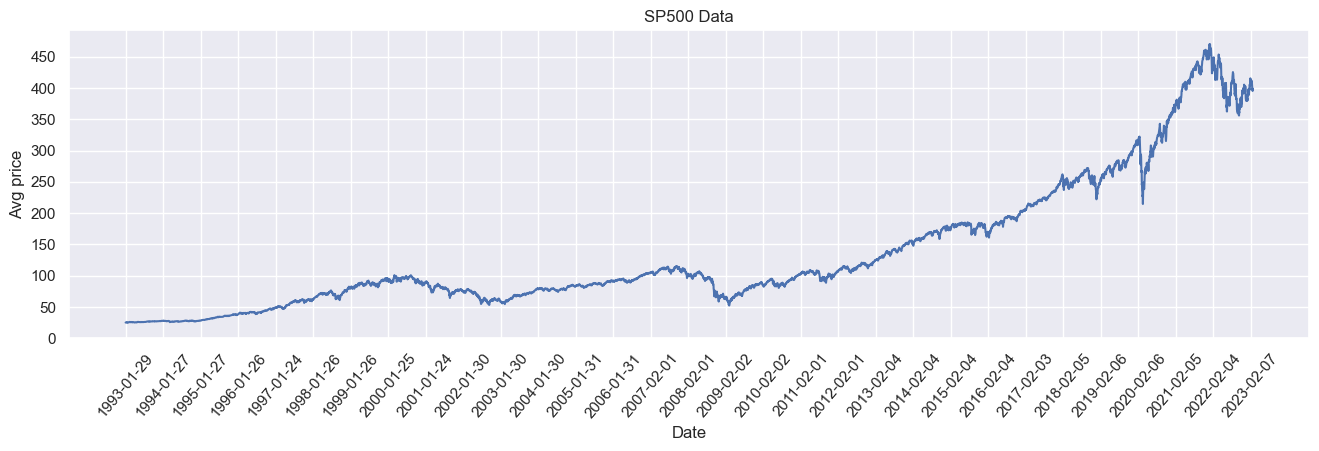

In [59]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16, 4)})
ax = sns.lineplot(x=df_raw['Date'], y=df_raw['avg'])
ax.set_xticks(range(0, len(df_raw), 252)) 
ax.set_yticks(range(0, 500, 50))
plt.title('SP500 Data')
plt.xlabel('Date')
plt.ylabel('Avg price')
plt.xticks(rotation=50)
plt.show()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
def lstm_split(data, n, offset):
    # helper function to split data in to chunks usable by LTSM
    x, y = [], []
    for i in range(offset, len(data)):
        x.append(data[i-n:i])
        y.append(data[i])

    return np.array(x), np.array(y)

def rmse_calc(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

def mape_calc(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [55]:
x = df_raw.drop('avg', axis=1)
x = x.drop('Date', axis=1)
y = df_raw['avg']
y = y.values.reshape(-1,1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [61]:
split = int(len(df_raw)*.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

[[0.42182017]
 [0.42191126]
 [0.42164838]
 ...
 [0.83221479]
 [0.84024385]
 [0.83731295]]


In [57]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
85/85 - 2s - loss: 0.0021 - val_loss: 0.0283 - 2s/epoch - 20ms/step
Epoch 2/50
85/85 - 0s - loss: 0.0050 - val_loss: 0.0066 - 120ms/epoch - 1ms/step
Epoch 3/50
85/85 - 0s - loss: 8.3471e-04 - val_loss: 0.0017 - 118ms/epoch - 1ms/step
Epoch 4/50
85/85 - 0s - loss: 2.0656e-04 - val_loss: 0.0014 - 119ms/epoch - 1ms/step
Epoch 5/50
85/85 - 0s - loss: 1.5856e-04 - val_loss: 0.0012 - 119ms/epoch - 1ms/step
Epoch 6/50
85/85 - 0s - loss: 1.4291e-04 - val_loss: 9.9036e-04 - 118ms/epoch - 1ms/step
Epoch 7/50
85/85 - 0s - loss: 1.3644e-04 - val_loss: 8.4598e-04 - 116ms/epoch - 1ms/step
Epoch 8/50
85/85 - 0s - loss: 1.3268e-04 - val_loss: 7.4453e-04 - 119ms/epoch - 1ms/step
Epoch 9/50
85/85 - 0s - loss: 1.2993e-04 - val_loss: 6.7801e-04 - 118ms/epoch - 1ms/step
Epoch 10/50
85/85 - 0s - loss: 1.2773e-04 - val_loss: 6.3991e-04 - 118ms/epoch - 1ms/step
Epoch 11/50
85/85 - 0s - loss: 1.2577e-04 - val_loss: 6.2591e-04 - 117ms/epoch - 1ms/step
Epoch 12/50
85/85 - 0s - loss: 1.2371e-04 - val_l

In [58]:
y_pred = model.predict(x_test)
mse = np.mean((y_pred - y_test)**2)

print(mse)

48/48 [==============================] - 0s 658us/step
8.994098798274066e-05


<AxesSubplot: ylabel='Count'>

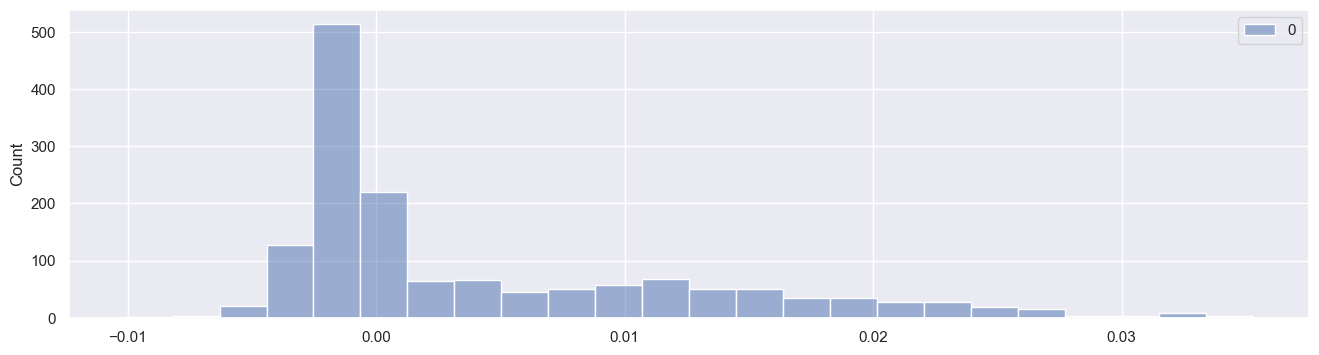

In [60]:
error = y_test - y_pred

sns.histplot(error)

In [63]:
sns.set(rc={'figure.figsize':(16, 4)})
ax = sns.lineplot(x=df_raw['Date'], y=y_test)
ax.set_xticks(range(0, len(df_raw), 252)) 
ax.set_yticks(range(0, 500, 50))
plt.title('SP500 Data')
plt.xlabel('Date')
plt.ylabel('Avg price')
plt.xticks(rotation=50)
plt.show()

ValueError: Per-column arrays must each be 1-dimensional